In [98]:
import requests

res = requests.post("http://localhost:8000/chat",
    json={"text": "Qué es Tuya?"}
)
res

<Response [200]>

In [99]:
res.content

b'{"ai_answer":"Tuya es una empresa tecnol\xc3\xb3gica que proporciona soluciones para el hogar inteligente, incluyendo dispositivos conectados y plataformas IoT para fabricantes y desarrolladores."}'

In [93]:
def get_stream(query: str):
    s = requests.Session()
    with s.post(
        "http://localhost:8000/chat_stream",
        stream=True,
        json={"text": query}
    ) as r:
        for line in r.iter_content():
            print(line.decode("latin-1"), end="")

In [83]:
byte_data = b' "Tuya es una entidad que ofrece tarjetas de cr\xc3\xa9dito con beneficios como descuentos exclusivos en almacenes \xc3\x89xito"'

# Decodificar los bytes a una cadena UTF-8
decoded_string = byte_data.decode('utf-8')
decoded_string

' "Tuya es una entidad que ofrece tarjetas de crédito con beneficios como descuentos exclusivos en almacenes Éxito"'

In [102]:
get_stream("Qu'est-ce que Tuya?")

 "Tuya is a company that offers credit cards with benefits such as exclusive discounts at certain stores, the ability to accumulate points, and the option to make purchases online or through contactless methods. They also provide cash advances and discounts at specific partner stores."
}
```

In [110]:
s = requests.Session()
with s.post(
    "http://localhost:8000/chat_stream",
    stream=True,
    json={"text": "Quien eres?"}
) as r:
    for line in r.iter_content(chunk_size =1):
        print(line.decode("latin-1"), end="")

 "Soy un asistente de lenguaje natural creado por Tuya S.A. Estoy aquÃ­ para ayudarte con cualquier pregunta que tengas."
}
```

In [1]:
import requests

r = requests.get("https://github.com/PyConColombia/website-2024/blob/develop/public/images/speaker/carlos-castaneda.jpeg")

with open("image1.jpeg", "wb") as f:
    f.write(r.content)

In [3]:
from PIL import Image
import numpy as np

array = np.array(Image.open("dog.png"))
array.shape

(512, 512, 3)

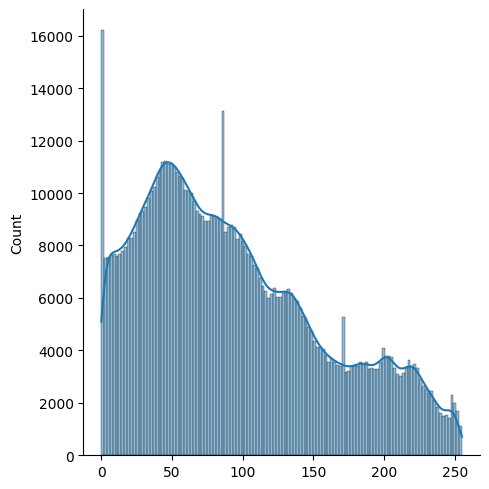

In [11]:
import seaborn as sns

sns.displot(array.flatten(), kde=True)

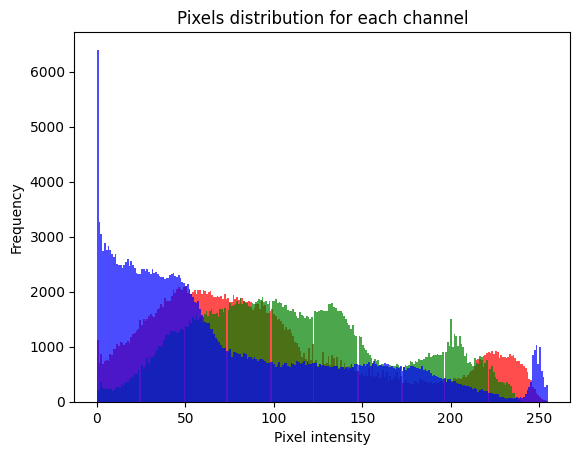

In [17]:
import matplotlib.pyplot as plt

# Si array tiene tres dimensiones (imagen en color)
if len(array.shape) == 3:
    # Desenredamos la forma en tres variables: altura, ancho y canales de color
    altura, ancho, canales = array.shape
    # Mostramos el histograma de cada canal de color por separado
    for i in range(canales):
        plt.hist(array[:,:,i].ravel(), bins=256, color=['red', 'green', 'blue'][i], alpha=0.7)
else:
    # Si array tiene solo dos dimensiones (imagen en escala de grises)
    altura, ancho = array.shape
    # Concatenamos las matrices de píxeles
    plt.hist(array.ravel(), bins=256, color='gray', alpha=0.7)

plt.xlabel('Pixel intensity')
plt.ylabel('Frequency')
plt.title('Pixels distribution for each channel')
plt.show()